#【例8.1】一元线性回归预测电影的票房收入。

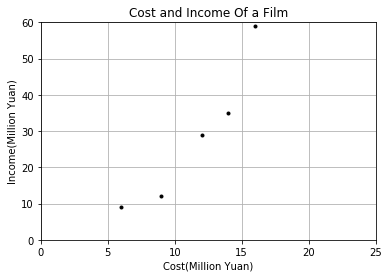

In [5]:

import matplotlib.pyplot as plt
def drawplt():
    plt.figure()
    plt.title('Cost and Income Of a Film')
    plt.xlabel('Cost(Million Yuan)')
    plt.ylabel('Income(Million Yuan)')
    plt.axis([0, 25, 0, 60])
    plt.grid(True)
X = [[6], [9], [12], [14], [16]]
y = [[9], [12], [29], [35], [59]]
drawplt()
plt.plot(X, y, 'k.')
plt.show()


投资2千万的电影预计票房收入为：69.95百万元
回归模型的系数是： [[4.78481013]]
回归模型的截距是： [-25.74683544]
最佳拟合线: y =  -25 ＋ 4 × x


C:\Users\52257\Anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


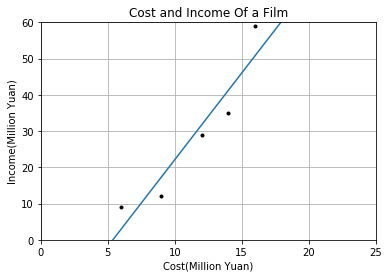

In [6]:
from sklearn import linear_model
import matplotlib.pyplot as plt
def drawplt():
    plt.figure()
    plt.title('Cost and Income Of a Film')
    plt.xlabel('Cost(Million Yuan)')
    plt.ylabel('Income(Million Yuan)')
    plt.axis([0, 25, 0, 60])
    plt.grid(True)

X = [[6], [9], [12], [14], [16]]
y = [[9], [12], [29], [35], [59]]
model = linear_model.LinearRegression()
model.fit(X, y)
a = model.predict([[20]])
w=model.coef_
b=model.intercept_
print("投资2千万的电影预计票房收入为：{:.2f}百万元".format(model.predict([[20]]) [0][0]))
print("回归模型的系数是：",w)
print("回归模型的截距是：",b)  
print("最佳拟合线: y = ",int(b),"＋", int(w),"× x" )
drawplt()
plt.plot(X, y, 'k.')
plt.plot([0,25],[b,25*w+b])
plt.show()


# 【例8.3】多元线性回归预测电影票房

In [7]:
import numpy as np
from sklearn import datasets,linear_model

x = np.array([[6,1,9],[9,3,12],[12,2,29],
              [14,3,35],[16,4,59]])
X = x[:,:-1]
Y = x[:,-1]
print('X:',X)
print('Y:',Y)

# 训练数据
regr = linear_model.LinearRegression()
regr.fit(X,Y)
print('系数(w1,w2)为:',regr.coef_)
print('截距(b)为:',regr.intercept_)
# 预测
y_predict = regr.predict(np.array([[10,3]]))
print('投资1千万，推广3百万的电影票房预测为：',y_predict,'百万')


X: [[ 6  1]
 [ 9  3]
 [12  2]
 [14  3]
 [16  4]]
Y: [ 9 12 29 35 59]
系数(w1,w2)为: [ 4.94890511 -0.70072993]
截距(b)为: -25.79562043795624
投资1千万，推广3百万的电影票房预测为： [21.59124088] 百万


# 【例8.4】逻辑回归预判信用卡逾期情况。

In [8]:
import pandas as pd
df = pd.read_csv("credit-overdue.csv", header=0) # 加载数据集
df.head()  #查看前5行数据


,debt,income,overdue
0,1.86,4.39,0
1,0.42,4.91,0
2,2.07,1.06,1
3,0.64,1.55,0
4,1.24,2.48,0


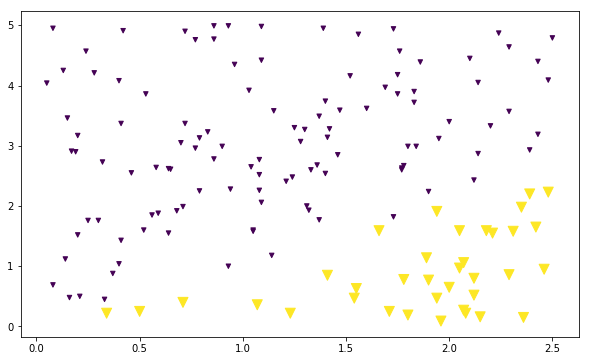

In [9]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))
map_size = {0: 20, 1: 100}
size = list(map(lambda x: map_size[x], df['overdue']))
plt.scatter(df['debt'],df['income'], s=size,c=df['overdue'],marker='v')


In [10]:
#定义Sigmoid函数
def sigmoid(z):
    sigmoid = 1 / (1 + np.exp(-z))
    return sigmoid
#定义对数损失函数
def loss(h, y):
    loss = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    return loss
#定义梯度下降函数
def gradient(X, h, y):
    gradient = np.dot(X.T, (h - y)) / y.shape[0]
    return gradient

# 逻辑回归过程
def Logistic_Regression(x, y, lr, num_iter):
    intercept = np.ones((x.shape[0], 1))  # 初始化截距为 1
    x = np.concatenate((intercept, x), axis=1)
    w = np.zeros(x.shape[1])  # 初始化参数为 0

    for i in range(num_iter):  # 梯度下降迭代
        z = np.dot(x, w)     # 线性函数
        h = sigmoid(z)      # sigmoid 函数
        g = gradient(x, h, y)  # 计算梯度
        w -= lr * g     # 通过学习率 lr 计算步长并执行梯度下降
        z = np.dot(x, w)     # 更新参数到原线性函数中
        h = sigmoid(z)      # 计算 sigmoid 函数值
        l = loss(h, y)        # 计算损失函数值
    return l, w        # 返回迭代后的梯度和参数

In [11]:
import numpy as np
x = df[['debt','income']].values
y = df['overdue'].values
lr = 0.001                 # 学习率
num_iter = 10000          # 迭代次数
# 模型训练
L = Logistic_Regression(x, y, lr, num_iter)
L

(0.1938336837185912, array([ 0.05603937,  0.9925221 , -1.3325938 ]))

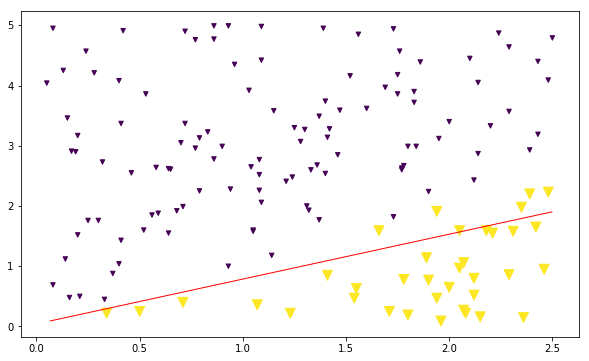

In [12]:
plt.figure(figsize=(10, 6))
map_size = {0: 20, 1: 100}
size = list(map(lambda x: map_size[x], df['overdue']))
plt.scatter(df['debt'],df['income'], s=size,c=df['overdue'],marker='v')

x1_min, x1_max = df['debt'].min(), df['debt'].max(),
x2_min, x2_max = df['income'].min(), df['income'].max(),

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]

probs = (np.dot(grid, np.array([L[1][1:3]]).T) + L[1][0]).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, levels=[0], linewidths=1, colors='red');


Text(0,0.5,'Loss function')

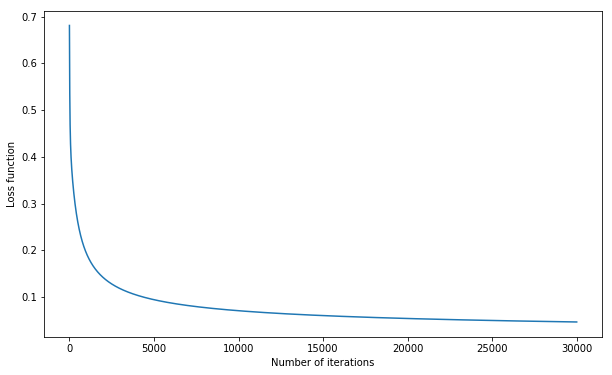

In [13]:
def Logistic_Regression(x, y, lr, num_iter):
    intercept = np.ones((x.shape[0], 1))  # 初始化截距为 1
    x = np.concatenate((intercept, x), axis=1)
    w = np.zeros(x.shape[1])           # 初始化参数为 1

    l_list = []                 # 保存损失函数值
    for i in range(num_iter):    # 梯度下降迭代
        z = np.dot(x, w)       # 线性函数
        h = sigmoid(z)        # sigmoid 函数

        g = gradient(x, h, y)    # 计算梯度
        w -= lr * g      # 通过学习率 lr 计算步长并执行梯度下降

        z = np.dot(x, w)  # 更新参数到原线性函数中
        h = sigmoid(z)   # 计算 sigmoid 函数值

        l = loss(h, y)     # 计算损失函数值
        l_list.append(l)
    return l_list

lr = 0.01          # 学习率
num_iter = 30000  # 迭代次数
l_y = Logistic_Regression(x, y, lr, num_iter)  # 训练

# 绘图
plt.figure(figsize=(10, 6))
plt.plot([i for i in range(len(l_y))], l_y)
plt.xlabel("Number of iterations")
plt.ylabel("Loss function")


# 【例8.6】逻辑回归预测鸢尾花。

In [14]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

clf=LogisticRegression(random_state=0,solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)

print('coef:\n',clf.coef_)
print('intercept:\n',clf.intercept_ )

print('predict first two:\n',clf.predict(X_train[:2, :]))
print('classification score:\n',clf.score(X_train, y_train))

predict_y = clf.predict(X_test)
print('classfication report:\n ',metrics.classification_report (y_test,predict_y))


coef:
 [[-0.53336716  0.76037956 -2.22753175 -0.98153033]
 [ 0.4195086  -0.42383793 -0.09564137 -0.83350288]
 [ 0.11385856 -0.33654163  2.32317311  1.81503322]]
intercept:
 [  9.87255697   2.39022805 -12.26278503]
predict first two:
 [1 1]
classification score:
 0.9714285714285714
classfication report:
               precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       0.88      0.93      0.90        15
          2       0.93      0.87      0.90        15

avg / total       0.93      0.93      0.93        45



#  本章实验

In [15]:
import numpy as np
data=np.array([[20,7000,800,1],[35,2000,2500,0],[27,5000,3000,1],[32,4000,4000,0],[45,2000,3800,0],[30,3500,3500,0]])
data[:,:3]  


array([[  20, 7000,  800],
       [  35, 2000, 2500],
       [  27, 5000, 3000],
       [  32, 4000, 4000],
       [  45, 2000, 3800],
       [  30, 3500, 3500]])

Text(0.5,0,'Income')

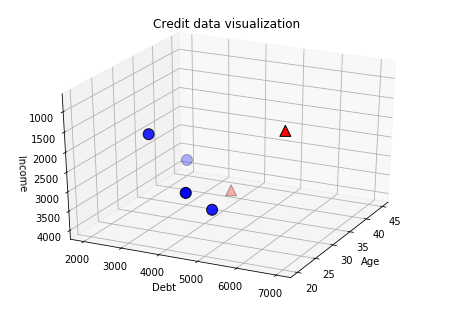

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, axes3d
X1=data[:,0]  #age
X2=data[:,1]  #debt
X3=data[:,2]  #income
Y=data[:,3]   #overdue   
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)  #elev、azim设置y轴、z轴旋转角度
mask = 0
ax.scatter(X1[Y==0], X2[Y==0], X3[Y==0], c='b', s=120, edgecolor='k')
ax.scatter(X1[Y==1], X2[Y==1], X3[Y==1], c='r', marker='^',s=120, edgecolor='k')
ax.set_title('Credit data visualization')   #设置图表标题
ax.set_xlabel("Age")
ax.set_ylabel("Debt")
ax.set_zlabel("Income")


In [17]:
from sklearn import linear_model
lr=linear_model.LogisticRegression()
lr.fit(data,data[:,3])


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
lr.coef_

array([[-1.21734145e-04,  9.07797784e-03, -1.18738689e-02,
         9.22182335e-06]])

In [19]:
lr.intercept_

array([-2.33365118e-06])

Text(0.5,0,'Income')

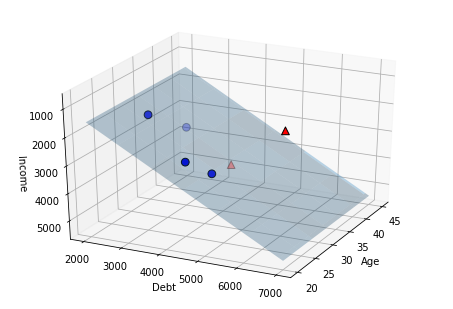

In [21]:
coef=lr.coef_[0]
intercept=lr.intercept_[0]
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)   #elev、azim设置y轴、z轴旋转角度
xx = np.linspace(X1.min() - 0.02, X1.max() +0.02, 50) #生成分类面x样本点
yy = np.linspace(X2.min() - 0.02, X2.max() +0.02, 50) #生成分类面y样本点
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2] #生成分类面z样本点
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3) #生成分类面
ax.scatter(X1[Y==0], X2[Y==0], X3[Y==0], c='b',s=60, edgecolor='k')
ax.scatter(X1[Y==1], X2[Y==1], X3[Y==1], c='r', marker='^',s=60, edgecolor='k')
ax.set_xlabel("Age")
ax.set_ylabel("Debt")
ax.set_zlabel("Income")


Text(0.5,0,'Income')

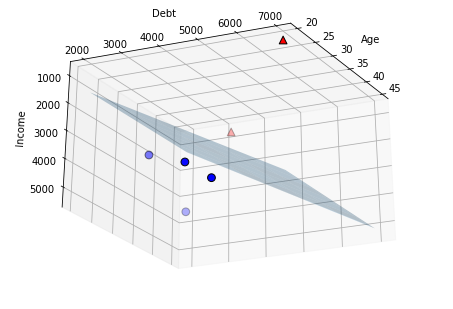

In [22]:
coef=lr.coef_[0]
intercept=lr.intercept_[0]
figure = plt.figure()
ax = Axes3D(figure, elev=152, azim=-26)   #elev、azim设置y轴、z轴旋转角度
xx = np.linspace(X1.min() - 0.02, X1.max() +0.02, 50) #生成分类面x样本点
yy = np.linspace(X2.min() - 0.02, X2.max() +0.02, 50) #生成分类面y样本点
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2] #生成分类面z样本点
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3) #生成分类面
ax.scatter(X1[Y==0], X2[Y==0], X3[Y==0], c='b',s=60, edgecolor='k')
ax.scatter(X1[Y==1], X2[Y==1], X3[Y==1], c='r', marker='^',s=60, edgecolor='k')
ax.set_xlabel("Age")
ax.set_ylabel("Debt")
ax.set_zlabel("Income")
